In [404]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

7.20415154627963e-17

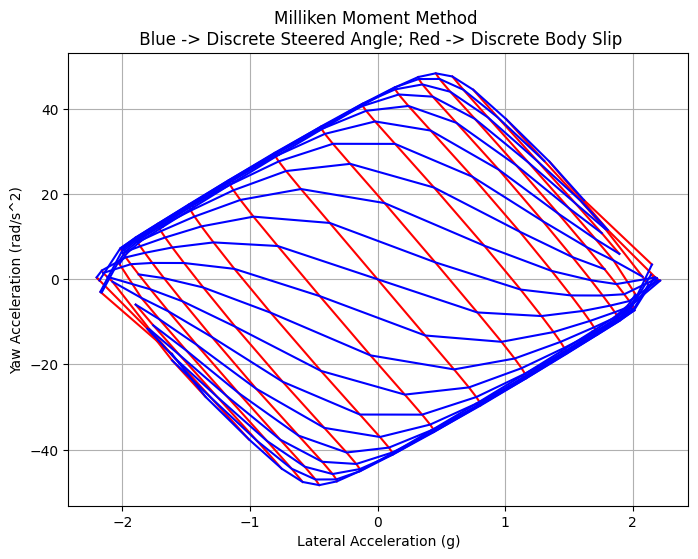

In [405]:
df = pd.read_csv("MMM.csv")

fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(111)

for x in df["body_slip"].unique():
    df2 = df[df["body_slip"] == x]
    lat_accel = list(df2["vehicle_accelerations_NTB_1"]/9.81)
    yaw_accel = list(df2["yaw_acceleration"])
    mid_point = int(len(lat_accel)/2)

    ax.plot(lat_accel, yaw_accel, 'r')
    #ax.text(lat_accel[mid_point], yaw_accel[mid_point], '{0:.2f}'.format(x*180/math.pi))

for x in df["steered_angle"].unique():
    if True:#x == 0:
        df2 = df[(df["steered_angle"] == x)]
        ax.plot(df2["vehicle_accelerations_NTB_1"]/9.81, df2["yaw_acceleration"], 'b')
ax.grid()
ax.set_ylabel("Yaw Acceleration (rad/s^2)")
ax.set_xlabel("Lateral Acceleration (g)")
ax.set_title("Milliken Moment Method \n Blue -> Discrete Steered Angle; Red -> Discrete Body Slip")

abs(df["yaw_acceleration"]).min()

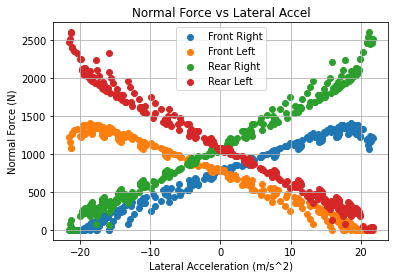

In [406]:
import math
plt.scatter(df["vehicle_accelerations_NTB_1"], df["front_left_tire_tire_centric_forces_2"], label = "Front Right")
plt.scatter(df["vehicle_accelerations_NTB_1"], df["front_right_tire_tire_centric_forces_2"], label = "Front Left")
plt.scatter(df["vehicle_accelerations_NTB_1"], df["rear_left_tire_tire_centric_forces_2"], label = "Rear Right")
plt.scatter(df["vehicle_accelerations_NTB_1"], df["rear_right_tire_tire_centric_forces_2"], label = "Rear Left")
plt.title("Normal Force vs Lateral Accel")
plt.grid()
plt.ylabel("Normal Force (N)")
plt.xlabel("Lateral Acceleration (m/s^2)")
plt.legend()

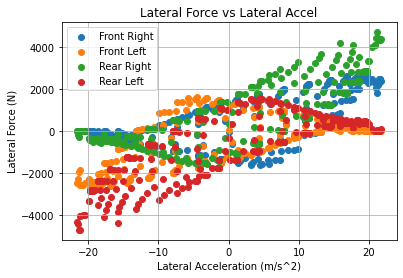

In [407]:
plt.scatter(df["vehicle_accelerations_NTB_1"], df["front_left_tire_vehicle_centric_forces_1"], label = "Front Right")
plt.scatter(df["vehicle_accelerations_NTB_1"], df["front_right_tire_vehicle_centric_forces_1"], label = "Front Left")
plt.scatter(df["vehicle_accelerations_NTB_1"], df["rear_left_tire_vehicle_centric_forces_1"], label = "Rear Right")
plt.scatter(df["vehicle_accelerations_NTB_1"], df["rear_right_tire_vehicle_centric_forces_1"], label = "Rear Left")
plt.title("Lateral Force vs Lateral Accel")
plt.grid()
plt.ylabel("Lateral Force (N)")
plt.xlabel("Lateral Acceleration (m/s^2)")
plt.legend()

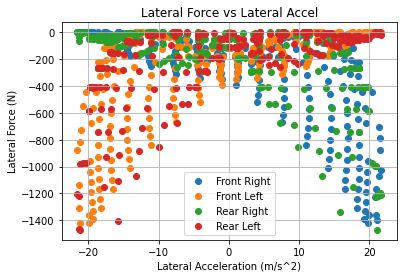

In [408]:
plt.scatter(df["vehicle_accelerations_NTB_1"], df["front_left_tire_vehicle_centric_forces_0"], label = "Front Right")
plt.scatter(df["vehicle_accelerations_NTB_1"], df["front_right_tire_vehicle_centric_forces_0"], label = "Front Left")
plt.scatter(df["vehicle_accelerations_NTB_1"], df["rear_left_tire_vehicle_centric_forces_0"], label = "Rear Right")
plt.scatter(df["vehicle_accelerations_NTB_1"], df["rear_right_tire_vehicle_centric_forces_0"], label = "Rear Left")
plt.title("Lateral Force vs Lateral Accel")
plt.grid()
plt.ylabel("Lateral Force (N)")
plt.xlabel("Lateral Acceleration (m/s^2)")
plt.legend()

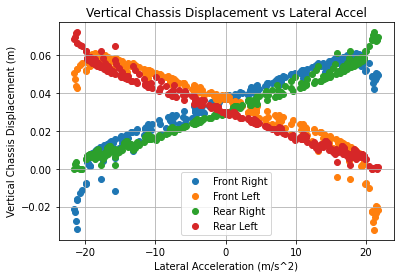

In [409]:
plt.scatter(df["vehicle_accelerations_NTB_1"], df["front_left_tire_z_c"], label = "Front Right")
plt.scatter(df["vehicle_accelerations_NTB_1"], df["front_right_tire_z_c"], label = "Front Left")
plt.scatter(df["vehicle_accelerations_NTB_1"], df["rear_left_tire_z_c"], label = "Rear Right")
plt.scatter(df["vehicle_accelerations_NTB_1"], df["rear_right_tire_z_c"], label = "Rear Left")
plt.title("Vertical Chassis Displacement vs Lateral Accel")
plt.grid()
plt.ylabel("Vertical Chassis Displacement (m)")
plt.xlabel("Lateral Acceleration (m/s^2)")
plt.legend()

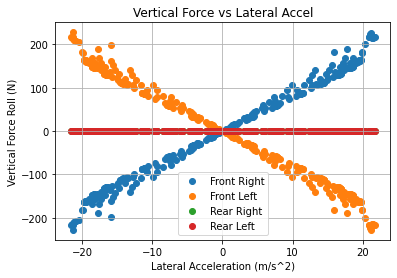

In [410]:
plt.scatter(df["vehicle_accelerations_NTB_1"], df["front_left_tire_f_roll"], label = "Front Right")
plt.scatter(df["vehicle_accelerations_NTB_1"], df["front_right_tire_f_roll"], label = "Front Left")
plt.scatter(df["vehicle_accelerations_NTB_1"], df["rear_left_tire_f_roll"], label = "Rear Right")
plt.scatter(df["vehicle_accelerations_NTB_1"], df["rear_right_tire_f_roll"], label = "Rear Left")
plt.title("Vertical Force vs Lateral Accel")
plt.grid()
plt.ylabel("Vertical Force Roll (N)")
plt.xlabel("Lateral Acceleration (m/s^2)")
plt.legend()

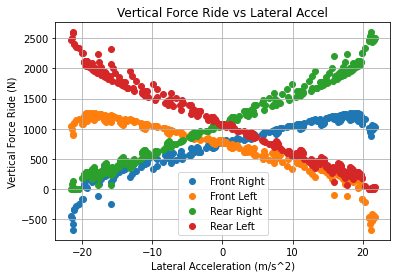

In [411]:
plt.scatter(df["vehicle_accelerations_NTB_1"], df["front_left_tire_f_heave"], label = "Front Right")
plt.scatter(df["vehicle_accelerations_NTB_1"], df["front_right_tire_f_heave"], label = "Front Left")
plt.scatter(df["vehicle_accelerations_NTB_1"], df["rear_left_tire_f_heave"], label = "Rear Right")
plt.scatter(df["vehicle_accelerations_NTB_1"], df["rear_right_tire_f_heave"], label = "Rear Left")
plt.title("Vertical Force Ride vs Lateral Accel")
plt.grid()
plt.ylabel("Vertical Force Ride (N)")
plt.xlabel("Lateral Acceleration (m/s^2)")
plt.legend()

No handles with labels found to put in legend.


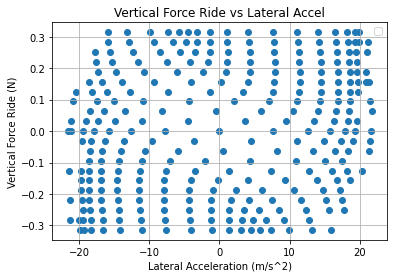

In [412]:
plt.scatter(df["vehicle_accelerations_NTB_1"], df["steered_angle"])
plt.title("Vertical Force Ride vs Lateral Accel")
plt.grid()
plt.ylabel("Vertical Force Ride (N)")
plt.xlabel("Lateral Acceleration (m/s^2)")
plt.legend()

In [413]:
x=df[abs(df["vehicle_accelerations_NTB_1"]) == abs(df["vehicle_accelerations_NTB_1"]).max()].iloc[0]
# for name, y in x.items():
#     print(name + ": " +str(y))
# print(x["y_double_dot"]/9.81)
# print(x["yaw_acceleration"])
# print(x["front_left_f_roll"])
# print(x["front_right_f_heave"]-x["front_left_f_heave"])
# print(x["rear_right_f_heave"]-x["rear_left_f_heave"])
# print(x["roll"]*180/math.pi)
print(x["front_left_tire_vehicle_centric_forces_0"])
print(x["front_left_tire_vehicle_centric_forces_1"])
print(x["front_left_tire_vehicle_centric_forces_2"])
print(x["rear_left_tire_vehicle_centric_forces_0"])
print(x["rear_left_tire_vehicle_centric_forces_1"])
print(x["rear_left_tire_vehicle_centric_forces_2"])
# print(x["front_right_tire_centric_forces_2"])
# print(x["rear_left_tire_centric_forces_2"])
# print(x["rear_right_tire_centric_forces_2"])
# print(x["front_left_tire_centric_forces_2"])
# print(x["front_right_tire_centric_forces_2"])
# print(x["rear_left_tire_centric_forces_2"])
# print(x["rear_right_tire_centric_forces_2"])
print("Max Lateral Accel:",x["vehicle_accelerations_NTB_1"])

-1026.00518105143
2408.588113769853
1201.8373901444215
-1212.318437845379
4407.390267805746
2504.798945059305
Max Lateral Accel: 21.749745737305236


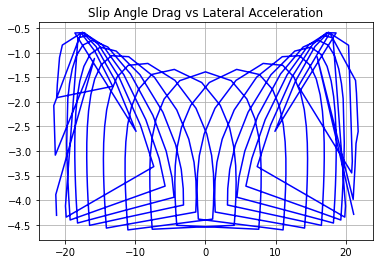

In [414]:
plt.plot(df["vehicle_accelerations_NTB_1"], df["vehicle_accelerations_NTB_0"], 'b')
#plt.plot(df["y_double_dot"], df["x_double_dot"], 'r')
plt.title("Slip Angle Drag vs Lateral Acceleration")
plt.grid()

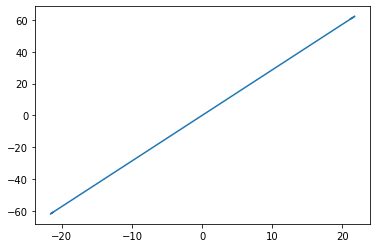

In [415]:
plt.plot(df["vehicle_accelerations_NTB_1"],df["vehicle_yaw_rate"]*180/math.pi)

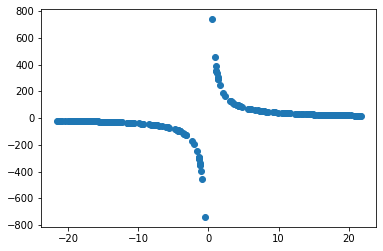

In [416]:
temp_df = df[abs(df["vehicle_turn_radius"]) < 1000]
plt.scatter(temp_df["vehicle_accelerations_NTB_1"],temp_df["vehicle_turn_radius"])

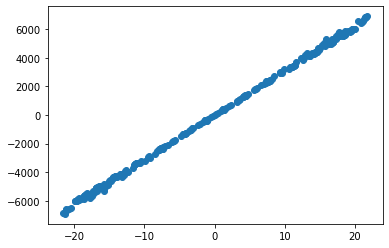

In [417]:
tires = ["front_left", "front_right", "rear_left", "rear_right"]
df["total_lat_force"] = df["front_left_tire_vehicle_centric_forces_1"] + df["front_right_tire_vehicle_centric_forces_1"] + df["rear_left_tire_vehicle_centric_forces_1"] + df["rear_right_tire_vehicle_centric_forces_1"]

plt.scatter(df["vehicle_accelerations_NTB_1"], df["total_lat_force"])

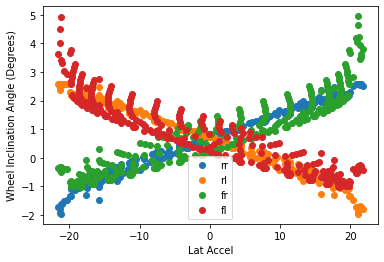

In [418]:
plt.scatter(df['vehicle_accelerations_NTB_1'], df['rear_right_tire_inclination_angle'] * (180 / np.pi), label='rr')
plt.scatter(df['vehicle_accelerations_NTB_1'], df['rear_left_tire_inclination_angle'] * (180 / np.pi), label='rl')
plt.scatter(df['vehicle_accelerations_NTB_1'], df['front_right_tire_inclination_angle'] * (180 / np.pi), label='fr')
plt.scatter(df['vehicle_accelerations_NTB_1'], df['front_left_tire_inclination_angle'] * (180 / np.pi), label='fl')
plt.legend()
plt.xlabel('Lat Accel')
plt.ylabel('Wheel Inclination Angle (Degrees)')
plt.show()

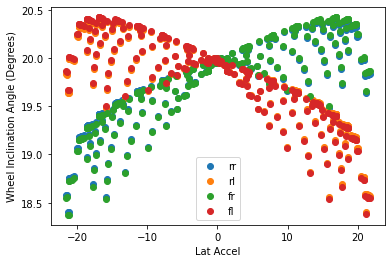

In [419]:
plt.scatter(df['vehicle_accelerations_NTB_1'], df['rear_right_tire_velocity_0'], label='rr')
plt.scatter(df['vehicle_accelerations_NTB_1'], df['rear_left_tire_velocity_0'], label='rl')
plt.scatter(df['vehicle_accelerations_NTB_1'], df['front_right_tire_velocity_0'], label='fr')
plt.scatter(df['vehicle_accelerations_NTB_1'], df['front_left_tire_velocity_0'], label='fl')
plt.legend()
plt.xlabel('Lat Accel')
plt.ylabel('Wheel Inclination Angle (Degrees)')
plt.show()

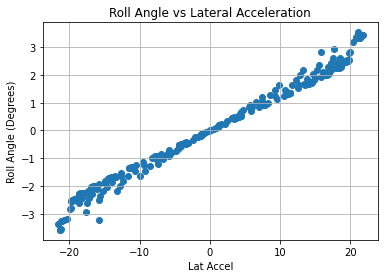

In [420]:
plt.scatter(df['vehicle_accelerations_NTB_1'], df['roll'] * (180 / np.pi))
plt.xlabel('Lat Accel')
plt.ylabel('Roll Angle (Degrees)')
plt.title("Roll Angle vs Lateral Acceleration")
plt.grid()
plt.show()

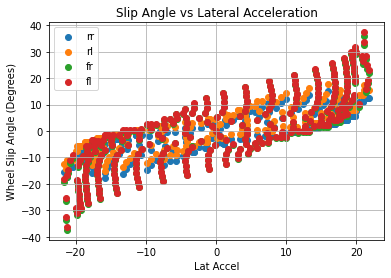

In [421]:
plt.scatter(df['vehicle_accelerations_NTB_1'], df['rear_right_tire_slip_angle'] * (180 / np.pi), label='rr')
plt.scatter(df['vehicle_accelerations_NTB_1'], df['rear_left_tire_slip_angle'] * (180 / np.pi), label='rl')
plt.scatter(df['vehicle_accelerations_NTB_1'], df['front_right_tire_slip_angle'] * (180 / np.pi), label='fr')
plt.scatter(df['vehicle_accelerations_NTB_1'], df['front_left_tire_slip_angle'] * (180 / np.pi), label='fl')
plt.legend()
plt.xlabel('Lat Accel')
plt.ylabel('Wheel Slip Angle (Degrees)')
plt.title("Slip Angle vs Lateral Acceleration")
plt.grid()
plt.show()

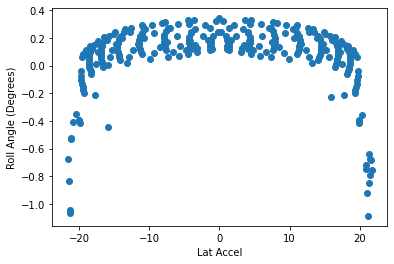

In [422]:
plt.scatter(df['vehicle_accelerations_NTB_1'], df['pitch'] * (180 / np.pi))
plt.xlabel('Lat Accel')
plt.ylabel('Roll Angle (Degrees)')
plt.show()

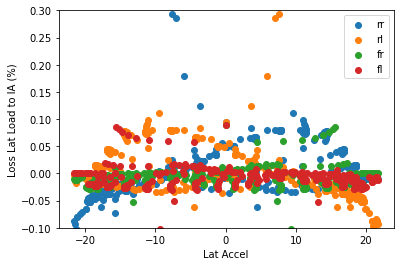

0.03841618869424169
-0.012492971700203349


In [423]:
plt.scatter(df['vehicle_accelerations_NTB_1'], df['rear_right_tire_inclination_angle_percent_loss'], label='rr')
plt.scatter(df['vehicle_accelerations_NTB_1'], df['rear_left_tire_inclination_angle_percent_loss'], label='rl')
plt.scatter(df['vehicle_accelerations_NTB_1'], df['front_right_tire_inclination_angle_percent_loss'], label='fr')
plt.scatter(df['vehicle_accelerations_NTB_1'], df['front_left_tire_inclination_angle_percent_loss'], label='fl')
plt.legend()
plt.xlabel('Lat Accel')
plt.ylabel('Loss Lat Load to IA (%)')
plt.ylim([-0.1,0.3])
plt.show()
print(df['rear_right_tire_inclination_angle_percent_loss'].mean())
print(df['front_right_tire_inclination_angle_percent_loss'].mean())

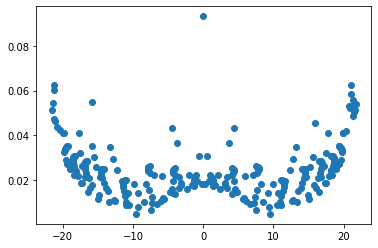

0.024716546114443332


In [424]:
plt.scatter(df["vehicle_accelerations_NTB_1"], df["dynamics_total_inclination_angle_percent_loss"])
plt.show()
print(df['dynamics_total_inclination_angle_percent_loss'].mean())

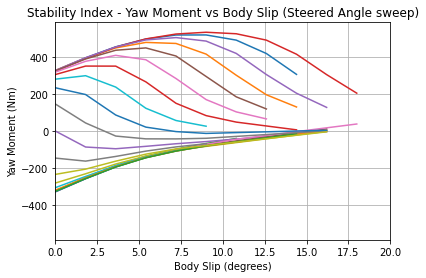

In [425]:
for x in df["steered_angle"].unique():
    if True:#x == 0:
        df2 = df[(df["steered_angle"] == x)]
        plt.plot(df2["body_slip"] * 180/math.pi, df2["vehicle_yaw_moment"]/9.81)
plt.xlim([0, 20])
plt.title("Stability Index - Yaw Moment vs Body Slip (Steered Angle sweep)")
plt.ylabel("Yaw Moment (Nm)")
plt.xlabel("Body Slip (degrees)")
plt.grid(True)
plt.show()